## Bump Hunter P-value issues
Kyle Cranmer, Dec 2, 2015

In [1]:
%pylab inline --no-import-all
import ROOT

Populating the interactive namespace from numpy and matplotlib


Welcome to ROOTaaS 6.05/03


The Poisson probability $p(n|b)$ -- note this is NOT a p-value

In [2]:
p_n_b = 3.31e-08

In [3]:
bump_hunter_test_stat = -np.log(p_n_b)
print bump_hunter_test_stat

17.2237325546


In [4]:
#currently reported local significance (NOT correct b/c this is not a p-value)
ROOT.RooStats.PValueToSignificance(p_n_b)

5.4011907104779615


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



What is the p-value for this observation?
I don't have the observed number of events in the peak or expected background handy, but looking at the plots I see 4 bins with roughly 30 events / bin in the peak gives ~120 background events and roughly 60 events signal. So hold n=180 and scan b to get the right p(n|b)

In [5]:
b_estimate = 118.6
ROOT.TMath.Poisson(180,b_estimate)

3.34924599381561e-08

In [6]:
p_value = ROOT.Math.poisson_cdf_c(180,b_estimate)
print p_value

6.18965474521e-08


In [7]:
ROOT.RooStats.PValueToSignificance(p_value)

5.287804625259286

In [8]:
n_array = np.arange(120,200)

In [9]:
from scipy.stats import poisson

/Users/cranmer/projects/roostats/root-v5-34/lib/ROOT.py:301: UserWarning: Module readline was already imported from /System/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/lib-dynload/readline.so, but /Library/Python/2.7/site-packages is being added to sys.path
  return _orig_ihook( name, *args, **kwds )


In [10]:
poisson.pmf(180, b_estimate)

3.3492459938157053e-08

In [11]:
poisson.sf(180, b_estimate)

6.1896547452065547e-08

[]

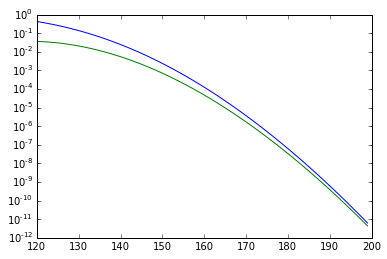

In [12]:
plt.plot(n_array, poisson.sf(n_array, b_estimate))
plt.plot(n_array, poisson.pmf(n_array, b_estimate))
plt.semilogy()

In [36]:
nobs_array = np.arange(1,20)
b_array = np.arange(0,5, .1)
nobs_array, b_array

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
         1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
         2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
         3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
         4.4,  4.5,  4.6,  4.7,  4.8,  4.9]))

In [41]:
p_with = np.zeros(nobs_array.size*b_array.size)
p_without = p_with*0.

for i, ntoy in enumerate(nobs_array):
    for j, btoy in enumerate(b_array):
        p_with[i*b_array.size+j] = ROOT.RooStats.NumberCountingUtils.BinomialObsZ(ntoy,btoy,.5)
        p_without[i*b_array.size+j] = ROOT.RooStats.NumberCountingUtils.BinomialObsZ(ntoy,btoy,.0005)

(0, 8)

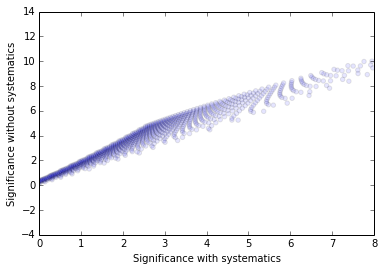

In [42]:
plt.scatter(p_with,p_without, alpha=.1)
plt.ylabel('Significance without systematics')
plt.xlabel('Significance with systematics')
plt.xlim(0,8)

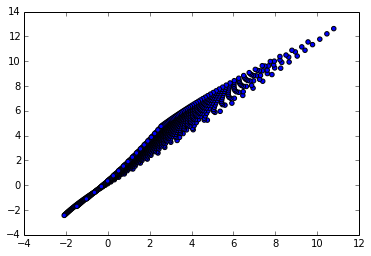

In [43]:
plt.scatter(p_with,p_without)